**Potato Leaf Disease Prediction**

# For training we have 900 images with label as 'Potato___Early_blight','Potato___Late_blight', 'Potato___healthy' and for validation we have 300 Images

In [9]:
import pandas as pd
import numpy  as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *

In [10]:
train_data_path='/content/drive/MyDrive/Potato_Train_Data'
valid_data_path='/content/drive/MyDrive/Potato_Valid_Data'

In [11]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

In [12]:
training_data=training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(224,224), 
                                      batch_size=32,
                                      class_mode='sparse')

Found 900 images belonging to 3 classes.


In [13]:
training_data.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [14]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
Validation_data=valid_datagen.flow_from_directory(valid_data_path, 
                                      target_size=(224,224), 
                                      batch_size=32,
                                      class_mode='sparse')

Found 300 images belonging to 3 classes.


In [16]:
model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
model.trainable=False

In [19]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPool2D()
])

In [20]:
model.add(Dense(3,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
model.compile(optimizer ='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_path = '/content/drive/MyDrive/CNN_Potato_leaf_Disease_project/CNN_Potato_leaf_Disease_project_VGG16.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint] 

In [25]:
history=model.fit(training_data,epochs=20, verbose=1, validation_data= Validation_data,steps_per_epoch=len(training_data),
  validation_steps=len(Validation_data),
              callbacks=callbacks_list)

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 0.9964 - accuracy: 0.5144
Epoch 1: val_accuracy improved from 0.54000 to 0.68000, saving model to /content/drive/MyDrive/CNN_Potato_leaf_Disease_project/CNN_Potato_leaf_Disease_project_VGG16.h5
29/29 [==============================] - 21s 704ms/step - loss: 0.9964 - accuracy: 0.5144 - val_loss: 0.8399 - val_accuracy: 0.6800
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 0.8447 - accuracy: 0.6333
Epoch 2: val_accuracy did not improve from 0.68000
29/29 [==============================] - 19s 680ms/step - loss: 0.8447 - accuracy: 0.6333 - val_loss: 0.7923 - val_accuracy: 0.6367
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 0.7686 - accuracy: 0.6867
Epoch 3: val_accuracy improved from 0.68000 to 0.77333, saving model to /content/drive/MyDrive/CNN_Potato_leaf_Disease_project/CNN_Potato_leaf_Disease_project_VGG16.h5
29/29 [==============================] - 20s 689ms/step - loss: 0.7

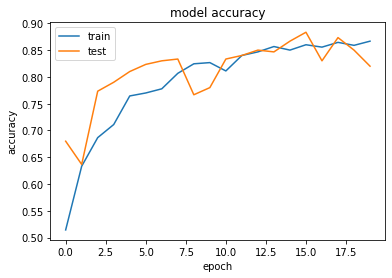

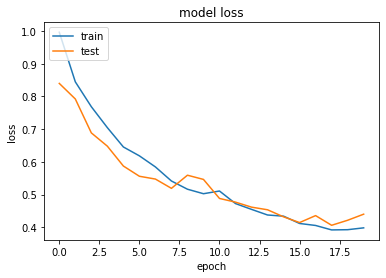

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.save('Potato_Leaf_Disease_Project.h5')